---
# Limpieza de Datos

- Identificación de valores perdidos
- Tratamiento de valores perdidos
- Valores atípicos

In [1]:
import pandas as pd

### Identificación de Valores Perdidos

In [2]:
df = pd.read_csv('real-estate.csv')

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [7]:
df = pd.read_csv('real-estate.csv', na_values=['na','--'])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [8]:
# valores únicos de una columna
df['OWN_OCCUPIED'].unique()

array(['Y', 'N', '12', nan], dtype=object)

In [9]:
# cantidad de valores únicos de la columna
df['OWN_OCCUPIED'].unique()

array(['Y', 'N', '12', nan], dtype=object)

In [10]:
# fercuencia de cada valor único en una columna
df['OWN_OCCUPIED'].value_counts()

Y     5
N     2
12    1
Name: OWN_OCCUPIED, dtype: int64

### Tratamiento de Valores Perdidos

In [12]:
# filtrar filar con valores perdidos
df.dropna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0


In [13]:
# filtrar columnas con valores perdidos
df.dropna(axis=1)

,ST_NAME
0,PUTNAM
1,LEXINGTON
2,LEXINGTON
3,BERKELEY
4,BERKELEY
5,BERKELEY
6,WASHINGTON
7,TREMONT
8,TREMONT


In [15]:
# filtrar subsets con valores perdidos
df.dropna(subset=['SQ_FT','NUM_BEDROOMS'])

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0


In [26]:
# umbral para filtrar valores perdidos
df.dropna(thresh=6)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [28]:
# imputación valor fijo
df.fillna(value=0)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,0.0
2,100003000.0,0.0,LEXINGTON,N,0.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,0,700.0
4,0.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,0.0,1,800.0
6,100007000.0,0.0,WASHINGTON,0,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,0.0
8,100009000.0,215.0,TREMONT,Y,0.0,2,1800.0


In [31]:
# imputar valor promedio en una columna numérica
df['SQ_FT'] = df['SQ_FT'].fillna(df['SQ_FT'].mean())
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


### Valores atípicos

In [37]:
df = pd.read_csv('titanic.csv')

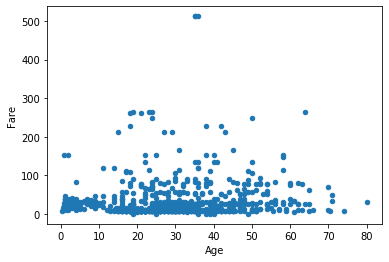

In [36]:
df.plot(kind='scatter', x='Age', y='Fare')

In [38]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

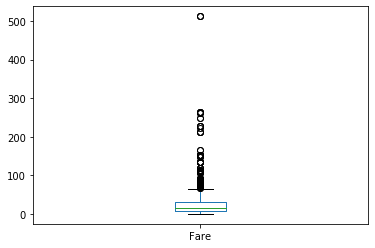

In [40]:
df['Fare'].plot(kind='box')